In [1]:
import pandas as pd

In [2]:
from pandas import DataFrame, Series, Index

In [3]:
%matplotlib inline

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.size"] = 16
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'

In [5]:
df = pd.read_csv("Madison.csv")

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
ACCDTYPE = df["ACCDTYPE"].value_counts()
top19_ACCDTYPE = ACCDTYPE[:15]
other_accdtype = ACCDTYPE[15:].sum()
top19_ACCDTYPE["OTHER"] = other_accdtype
top19_ACCDTYPE.rename(index={"PK VEH": "Parked vehicle", "TREE":"Tree","DEER":"Deer","CURB":"Curb","FENCE":"Fence","DITCH":"Ditch","OTHER":"Other","TFSIGN": "Traffic sign","PED":"Pedestrian","TF SIG":"Traffic signal","OTH NC":" Other non-collision","OTHFX":"Other object fixed","MED B":"Median barrier","LTPOLE":"Lum light support","UTPOLE":"Utility Pole","GR FAC":"Guardrail face","OVRTRN":"Overturned vehicle","OBNFX":"Object not fixed","OT PST":"Other post"}, inplace=True)
print(top19_ACCDTYPE)
ax1 = top19_ACCDTYPE.plot.bar(colors=color)
fig = matplotlib.pyplot.gcf()

Parked vehicle          4493
Tree                    1884
Traffic sign            1223
Pedestrian              1203
BIKE                    1119
Curb                    1114
Traffic signal          1025
 Other non-collision     892
Other object fixed       876
Median barrier           815
Deer                     806
Lum light support        802
Utility Pole             792
Guardrail face           597
Overturned vehicle       488
Other                   2259
Name: ACCDTYPE, dtype: int64


NameError: name 'color' is not defined

In [7]:
ax1.get_figure().savefig("ACCDTYPE.eps", bbox_inches = "tight")
# Top7 are parked vehicle, tree, traffic sign, pedestrian, bicycle, crub, traffic signal 

NameError: name 'ax1' is not defined

In [8]:
import sqlite3
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)

In [9]:
def qry(sql):
    return pd.read_sql(sql, conn)

In [10]:
crash = pd.read_csv("ProcessedData.csv")

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
conn = sqlite3.connect('crash.db')
crash.to_sql("crash", conn, if_exists="replace", index=False)

In [12]:
INJ_FAT_ACCDTYPE = qry ("""
SELECT ACCDTYPE, count(), sum(TOTFATL)
FROM crash 
WHERE ACCDTYPE="PK VEH" or ACCDTYPE="TREE" or ACCDTYPE="DEER" or ACCDTYPE="CURB" or ACCDTYPE="FENCE" or ACCDTYPE="DITCH" or ACCDTYPE="TFSIGN" or ACCDTYPE="PED" or ACCDTYPE="TF SIG" or ACCDTYPE="OTH NC" or ACCDTYPE="OTHFX" or ACCDTYPE="MED B" or ACCDTYPE="LTPOLE" or ACCDTYPE="UTPOLE" or ACCDTYPE="GR FAC" or ACCDTYPE="OVRTRN" or ACCDTYPE="OBNFX" or ACCDTYPE="OT PST"
GROUP BY ACCDTYPE
""")
print(INJ_FAT_ACCDTYPE[1:19])

   ACCDTYPE  count()  sum(TOTFATL)
1      DEER      806             1
2     DITCH      286             4
3     FENCE      315             0
4    GR FAC      597             5
5    LTPOLE      802             0
6     MED B      815             1
7     OBNFX      406             1
8    OT PST      328             0
9    OTH NC      892             5
10    OTHFX      876             2
11   OVRTRN      488             8
12      PED     1203            37
13   PK VEH     4493             7
14   TF SIG     1025             2
15   TFSIGN     1223             4
16     TREE     1884            24
17   UTPOLE      792             8


In [13]:
INJ_FAT_ACCDTYPE = qry ("""
SELECT ACCDTYPE, count(Month) as "Sum", sum(TOTFATL) as "Fatality",0 as "ratio"
FROM crash 
GROUP BY ACCDTYPE
ORDER BY Fatality DESC
""")

for i in range(len(INJ_FAT_ACCDTYPE)):
    INJ_FAT_ACCDTYPE["ratio"][i]=(INJ_FAT_ACCDTYPE["Fatality"][i]/INJ_FAT_ACCDTYPE["Sum"][i])*10000

TYPE=Series({"Train":5.55,"Pedestrian":3.07 ,"Jackknife":2.77,"Overturned vehicle":1.63,"Ditch":1.39,"Tree":1.27," Guardrail end":1.03,"Utility Pole":1.01,"Guardrail face":0.83,"Bike":0.62})
SUM=Series({"Train":18,"Pedestrian":1203 ,"Jackknife":36,"Overturned vehicle":488,"Ditch":286,"Tree":1884," Guardrail end":193,"Utility Pole":792,"Guardrail face":597,"Bike":1119})
m5=pd.concat([TYPE,SUM],axis=1)
m5.columns=["% Fatality","Total"]
print(m5)

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


                    % Fatality  Total
Train                     5.55     18
Pedestrian                3.07   1203
Jackknife                 2.77     36
Overturned vehicle        1.63    488
Ditch                     1.39    286
Tree                      1.27   1884
 Guardrail end            1.03    193
Utility Pole              1.01    792
Guardrail face            0.83    597
Bike                      0.62   1119


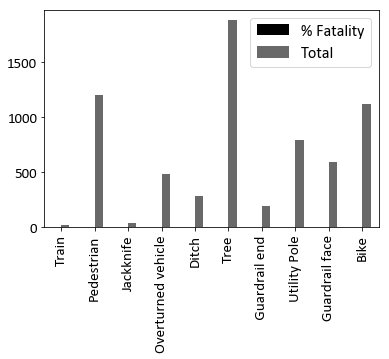

In [14]:
colors=["black","dimgrey"]
ax=m5.plot.bar(color=colors,fontsize=15)

d:\搜狗高速下载\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


NameError: name 'mtick' is not defined

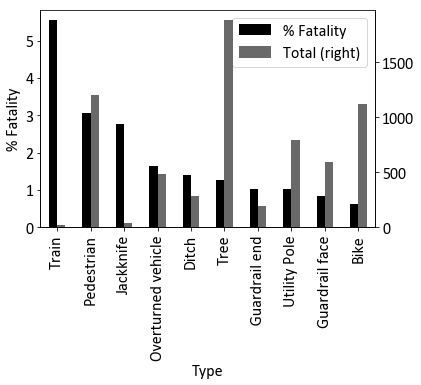

In [15]:
color=["black","dimgrey"]
ax = m5.plot( kind= 'bar' ,colors=color, secondary_y= 'Total' , rot= 90 )
ax.set_xlabel("Type") 
ax.set_ylabel("% Fatality") 

ax.spines['top'].set_visible(False) 

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

fig = matplotlib.pyplot.gcf()
fig.savefig('TYPEF.eps', dpi=100, bbox_inches="tight")

NameError: name 'mtick' is not defined

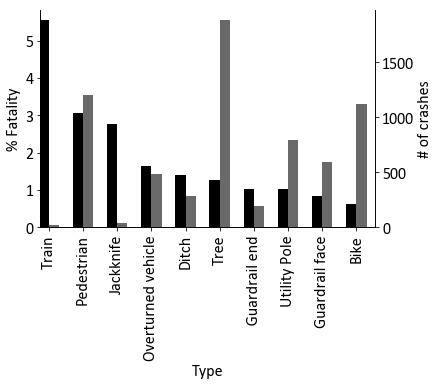

In [16]:
fig = plt.figure() 
ax = fig.add_subplot(111) # Create matplotlib axes 
ax2 = ax.twinx() 
width = 0.3
ax.set_xlabel("Type") 
ax.set_ylabel("% Fatality") 
ax2.set_ylabel("# of crashes")
ax.spines['top'].set_visible(False) 
ax2.spines['top'].set_visible(False) 

m5["% Fatality"].plot.bar(color="black", ax=ax, width=width,position=1) 
m5["Total"].plot.bar(color="dimgrey", ax=ax2, width=width,position=0) 

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt) 
ax.yaxis.set_major_formatter(yticks) 
ax.set_ylim(0,6) 
ax2.set_ylim(0,1500) 

fig = matplotlib.pyplot.gcf()
fig.savefig('TYPEF.eps', dpi=100, bbox_inches="tight")
plt.show()

ValueError: Invalid color argument: ''

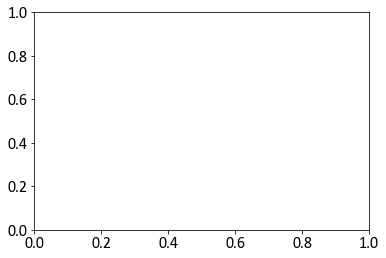

In [17]:
colors=[]
ax=m5.plot.bar(color=colors,fontsize=15)
ax1 = ax.twinx()



import matplotlib.ticker as mtick
import numpy as np

ax.set_xlabel("Type")
ax.set_ylabel("% Fatality")
ax1.set_ylabel("# of crashes")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_ylim(0,7)
ax1.set_ylim(0,5000)

ax1.set_ylim(0,5000)
fig = matplotlib.pyplot.gcf()
fig.savefig('TYPEF.eps', dpi=100, bbox_inches="tight")

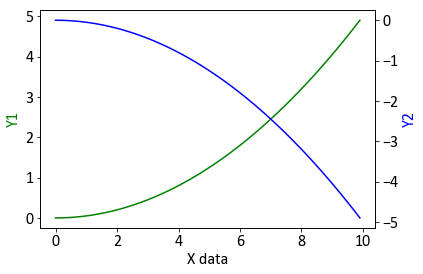

In [18]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.arange(0,10,0.1)
 
y1 = 0.05 * x**2
y2 = -1 * y1
 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')
 
ax1.set_xlabel("X data")
ax1.set_ylabel("Y1",color='g')
 
ax2.set_ylabel("Y2",color='b')
 
plt.show()

In [19]:
SORT= qry ("""
SELECT ACCDTYPE,count()
FROM crash 
GROUP BY "ACCDTYPE"
ORDER BY count() DESC limit 10
""")

INJ_PED = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="PED"
GROUP BY "MONTH"
""")

INJ_BIKE = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="BIKE"
GROUP BY "MONTH"
""")

INJ_PKVEH = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="PK VEH"
GROUP BY "MONTH"
""")

INJ_TREE = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="TREE"
GROUP BY "MONTH"
""")

INJ_OTHNC = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="OTH NC"
GROUP BY "MONTH"
""")

INJ_TFSIGN = qry ("""
SELECT MONTH,count()
FROM crash 
WHERE ACCDTYPE ="TFSIGN"
GROUP BY "MONTH"
""")

m1_t = pd.DataFrame({"Parked vehicle":INJ_PKVEH["count()"],"Tree":INJ_TREE["count()"],"Bike":INJ_BIKE["count()"],"Pedestrian":INJ_PED["count()"],"Trafiic sign":INJ_TFSIGN["count()"] })
print(m1_t["Bike"])

0      20
1      27
2      42
3      89
4     109
5     132
6     149
7     151
8     157
9     121
10     91
11     31
Name: Bike, dtype: int64


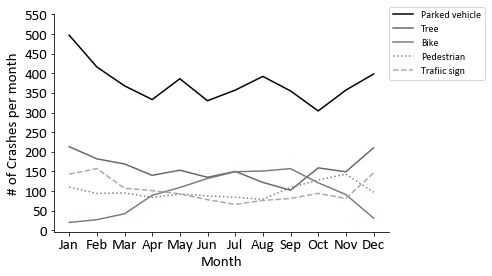

In [20]:
m1_t["Parked vehicle"].plot(color="black",fontsize=15,rot=0)
m1_t["Tree"].plot(color="dimgrey",fontsize=15,rot=0)
m1_t["Bike"].plot(color="slategrey",fontsize=15,rot=0)
m1_t["Pedestrian"].plot(color="grey",linestyle=':',fontsize=15,rot=0)
m1_t["Trafiic sign"].plot(color="darkgrey",linestyle='--',fontsize=15,rot=0)
ax = plt.gca()
ax.set_xlabel("Month",fontsize=15)
plt.xticks(np.arange(12),('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax.set_ylabel("# of Crashes per month",fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,600,50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.7],fontsize=10)
    
fig = matplotlib.pyplot.gcf()
fig.savefig("MonthM.eps", dpi=100,bbox_inches="tight")